In [2]:
import pandas as pd

In [3]:
#reading clean dataset
combined_data = pd.read_csv(r'..\data\clean\clean.csv')

In [4]:
display(combined_data.head())

,store,dept,date,weekly_sales,isholiday,type,size,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,day,month,year
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,5,Feb,2010
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,12,Feb,2010
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,19,Feb,2010
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,26,Feb,2010
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,5,Mar,2010


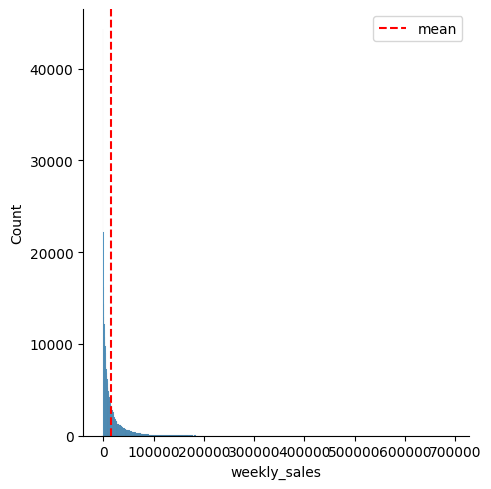

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(combined_data['weekly_sales'])
plt.axvline(x=np.mean(combined_data['weekly_sales']), c='red', ls='--', label='mean')
#plt.axvline(x=np.percentile(combined_data['weekly_sales'],25),c='green', ls='--', label = '25th percentile:Q1')
#plt.axvline(x=np.percentile(combined_data['weekly_sales'],75),c='orange', ls='--',label = '75th percentile:Q3' )
plt.legend()

Question: 1 How do different types of stores (e.g., Type A, Type B, Type C) perform in terms of average weekly sales and growth over time?

Calculate the average weekly sales for each store type (Type A, Type B, Type C).
Visualize the average weekly sales for each store type, possibly using bar plots.
Analyze the growth over time by examining trends in weekly sales for each store type over different periods (e.g., months, years).

AVERAGE WEEKLY SALES BY STORE TYPES

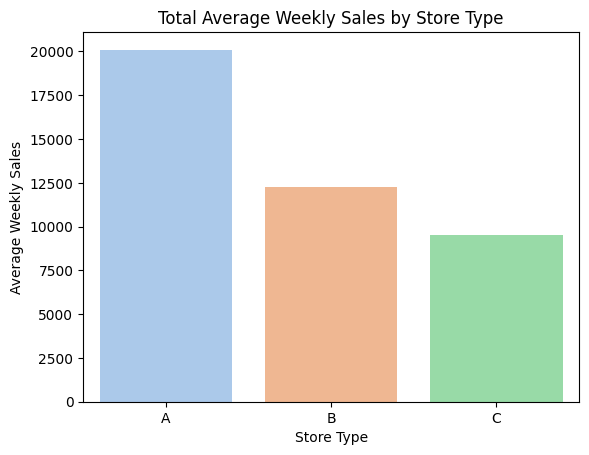

In [6]:
#weekly sales on the basis of store types
average_weekly_sales_store = combined_data.groupby('type')['weekly_sales'].mean().reset_index()
# create a barplot using sns
sns.barplot(x= 'type' , y= 'weekly_sales' , data = average_weekly_sales_store,palette = "pastel", hue = 'type' , legend = False)
plt.title("Total Average Weekly Sales by Store Type")
plt.xlabel("Store Type")
plt.ylabel("Average Weekly Sales")
plt.savefig("../images/Total_Average_Weekly_Sales_by_Store_Type.png")
plt.show()

order of average weekly sales 
A>B>C

MONTHLY CHANGE IN AVERAGE WEEKLY SALES 

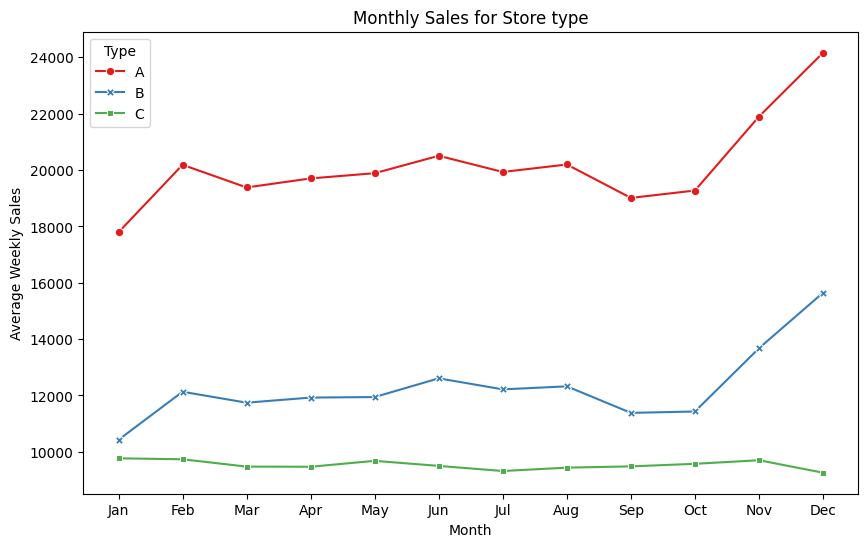

In [7]:
#group monthly sales by month and stor type
monthly_sales_store_type = combined_data.groupby(['month', 'type'])
#calculate monthly avg sales
monthly_weeklysales_store_month = monthly_sales_store_type['weekly_sales'].mean().reset_index()
# Create a pivot table to organize the data for plotting
pivot_table = monthly_weeklysales_store_month.pivot(index='month', columns='type', values='weekly_sales').reindex(["Jan","Feb","Mar",
                "Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])

# Create a line plot to visualize monthly sales for each year
plt.figure(figsize=(10, 6))
sns.lineplot(data=pivot_table, markers=True, dashes=False, palette='Set1')
plt.title('Monthly Sales for Store type')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales')
plt.legend(title='Type')
plt.savefig("../images/monthly_weeklysales_store_type.png")
plt.show()

PEAK SALES IN THE MONTH OF DEC AND NOV
STORES A AND FOLLOW SAME PATTERN BUT A SHOWS HIGH WEEKLY SALES 
NO CHANGE IN WEEKLY SALES OF STORE C

Question 2: Are there significant seasonal patterns in average weekly sales?

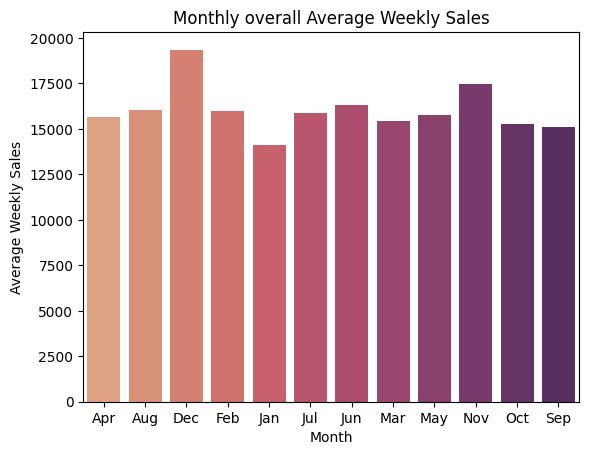

In [8]:
# COMPARE OVERALL WEEKLY SALES BY MONTHS
monthly_weekly_sales = combined_data.groupby('month')['weekly_sales'].mean().reset_index()
# create a barplot using sns
sns.barplot(x= 'month' , y= 'weekly_sales' , data = monthly_weekly_sales ,palette = "flare", hue = 'month' , legend = False)
plt.title("Monthly overall Average Weekly Sales")
plt.xlabel("Month")
plt.ylabel("Average Weekly Sales")
plt.savefig("../images/monthly_weekly_sales.png")
plt.show()

Highest average weekly is in December month

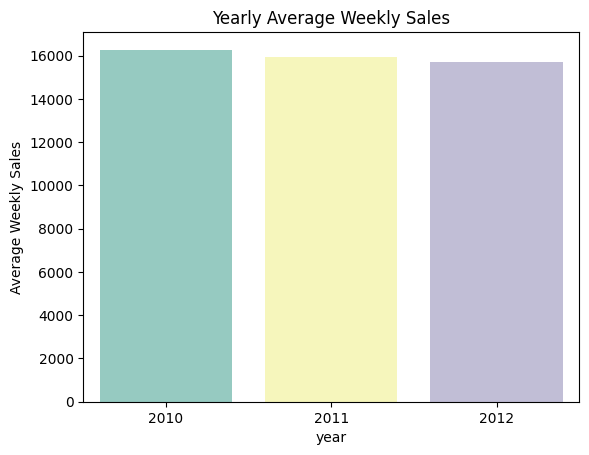

In [9]:
#COMPARE OVERALL WEEKLY SALES BY year
yeary_weekly_sales = combined_data.groupby('year')['weekly_sales'].mean().reset_index()
# create a barplot using sns
sns.barplot(x= 'year' , y= 'weekly_sales' , data = yeary_weekly_sales ,palette = "Set3", hue = 'year' , legend = False)
plt.title("Yearly Average Weekly Sales")
plt.xlabel("year")
plt.ylabel("Average Weekly Sales")
plt.savefig("../images/yeary_weekly_sales.png")
plt.show()

No major difference in average weekly sales accross 3 years

line plot for monthly sales by year helps identify recurring patterns within each year.

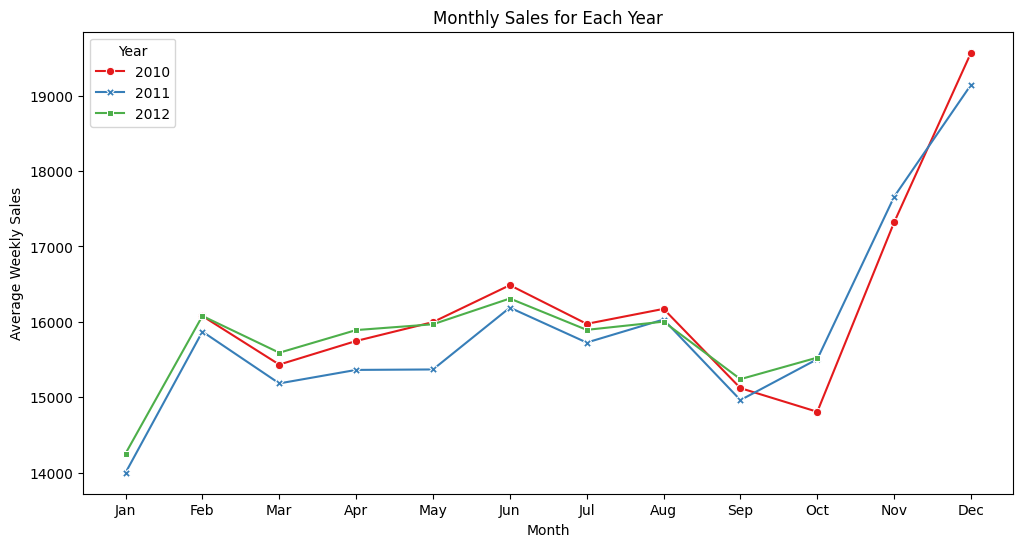

In [10]:
yearly_monthly_data = combined_data.groupby(['year',"month"])

# Calculate average weekly sales for each year
average_sales_by_year_month = yearly_monthly_data['weekly_sales'].mean().reset_index()


# Create a pivot table to organize the data for plotting
pivot_table = average_sales_by_year_month.pivot(index='month', columns='year', values='weekly_sales').reindex(["Jan","Feb","Mar",
                "Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])


# Create a line plot to visualize monthly sales for each year
plt.figure(figsize=(12, 6))
sns.lineplot(data=pivot_table, markers=True, dashes=False, palette='Set1')
plt.title('Monthly Sales for Each Year')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales')
plt.legend(title='Year')
plt.savefig("../images/average_sales_by_year_month.png")
plt.show()

Steep rise in sale october onwards. Dips in Jan but start picking up in feb. biggest dip is in sep for all 3 years.

Question:3 How do external factors such as temperature, fuel prices, CPI, and unemployment rates affect weekly sales?

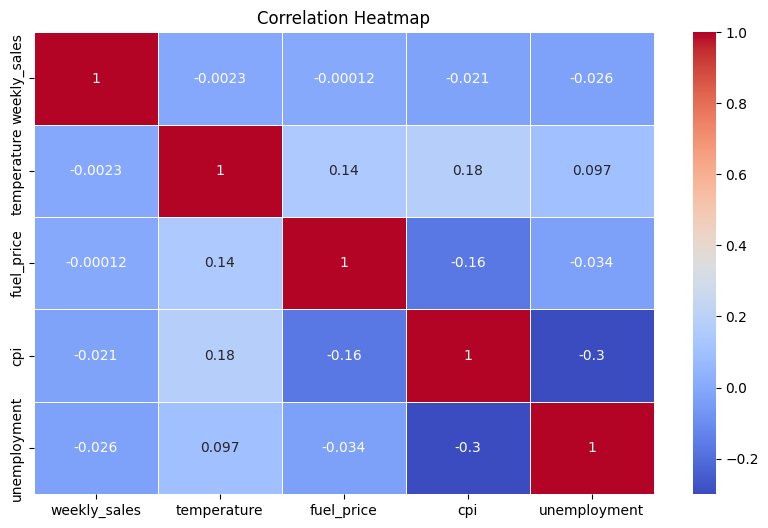

In [11]:
# Calculate the correlation matrix
correlation_matrix = combined_data[['weekly_sales', 'temperature', 'fuel_price', 'cpi', 'unemployment']].corr()

# Create a heatmap to visualize correlations
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.savefig("../images/correlation_matrix_external_factors.png")
plt.show()


The correlation coefficient is bound between -1 and 1 and tells you the linear relationship between these two variables. A coefficient close to 1 means a strong and positive associantion between the two variables (when one of them grows, the other does, also, and when one of them decreases, the other one does the same).
A coefficient close to -1 means strong negative association between the two variables, this is, observations with a large value in one of the variables tend to have a small value in the other variable or vice-versa.
A coeffcient close to 0 means no linear relation between the two variableers:
1) Association does not mean necessarily a causal relation between both variables. For example, there might be a third variable you have not cosidered and this third variable might be the explanation for the behaviour of the other two.
2) Even if there is a causal relationship between the variables, the correlation coefficient does not tell you which variable is the cause and which is the effect.
3) If the coefficient is clse to 0, it does not necessarily mean that there is no relation between the two variables. It means there is'nt a LINEAR relationship, but there might be another type of functional relationship (for example, quadratic or exponential).

clearly , there is no linear relationship between the temperature, fuel prices, CPI, and unemployment rates and  weekly sales
But that does not mean that there is no relation between the two.

Scatter plots for these variable swill help us to explore the relationships between weekly sales and each external factor individually. Scatterplots can help to identify any non-linear patterns or outliers in the data.



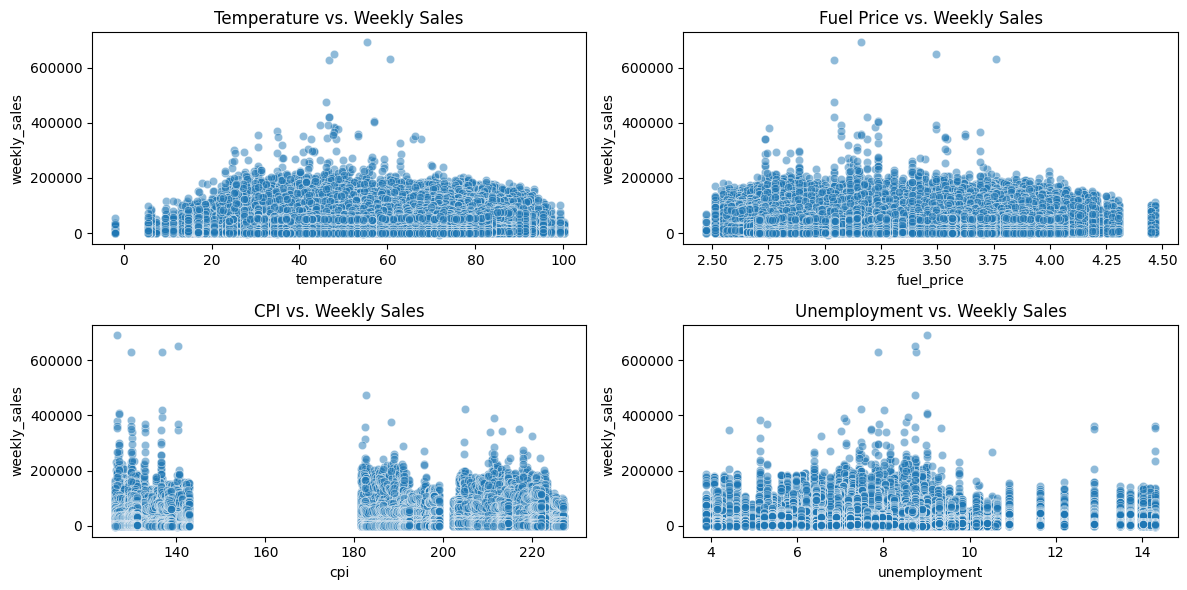

In [12]:
# Create scatterplots for each external factor vs. weekly sales
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.scatterplot(x='temperature', y='weekly_sales', data=combined_data, alpha=0.5)
plt.title('Temperature vs. Weekly Sales')


plt.subplot(2, 2, 2)
sns.scatterplot(x='fuel_price', y='weekly_sales', data=combined_data, alpha=0.5)
plt.title('Fuel Price vs. Weekly Sales')


plt.subplot(2, 2, 3)
sns.scatterplot(x='cpi', y='weekly_sales', data=combined_data, alpha=0.5)
plt.title('CPI vs. Weekly Sales')


plt.subplot(2, 2, 4)
sns.scatterplot(x='unemployment', y='weekly_sales', data=combined_data, alpha=0.5)
plt.title('Unemployment vs. Weekly Sales')
plt.savefig("../images/scatter_plots_ext_factors.png")

plt.tight_layout()
plt.show()

The data where one variable doesn't vary much across the range of the other variable, we may see a vertical line of data points.
There is little to no variation in one of the variables (the one represented on the x-axis) across the range of the other variable (the one represented on the y-axis). This type of scatter plot suggests a lack of correlation or a very weak relationship between the two variables.
In summary, a scatter plot parallel to the y-axis is typically an indicator of either a lack of variation in the x-variable, a strong negative correlation, or a weak/no correlation between the two variables being compared. 

There is no linear relationship between weekly sales and external factors such as temperature, fuel prices, CPI, and unemployment rates

Question 4 How do holidays impact weekly sales? Compare the sales during holiday weeks to non-holiday weeks.
dentify holiday weeks in your dataset.
Group the data into holiday and non-holiday weeks.
Calculate and compare summary statistics (e.g., mean sales) for both groups.
Use visualizations (e.g., bar plots) to compare sales during holidays and non-holidays.

In [19]:
# separate lists of holiday and non holiday weeks
holiday_sales = combined_data[combined_data['isholiday']== True]
non_holiday_sales = combined_data[combined_data['isholiday']== False]
#summary stats sales for these days
holiday_summary_sales = holiday_sales['weekly_sales'].describe().reset_index()
non_holiday_summary_sales = non_holiday_sales['weekly_sales'].describe().reset_index()
holiday_summary_sales.rename(columns={'index': 'Statistic', 'weekly_sales': 'Holiday_Weekly_Sales'}, inplace=True)
non_holiday_summary_sales.rename(columns={'index': 'Statistic', 'weekly_sales': 'Non_Holiday_Weekly_Sales'}, inplace=True)
display(holiday_summary_sales)
display(non_holiday_summary_sales)

print(holiday_sales.shape)
print(non_holiday_sales.shape)


,Statistic,Holiday_Weekly_Sales
0,count,29661.000000
1,mean,17035.823187
2,std,27222.000409
3,min,-798.000000
4,25%,2078.540000
5,50%,7947.740000
6,75%,21189.250000
7,max,693099.360000


,Statistic,Non_Holiday_Weekly_Sales
0,count,391909.000000
1,mean,15901.445069
2,std,22330.747450
3,min,-4988.940000
4,25%,2079.750000
5,50%,7589.950000
6,75%,20131.210000
7,max,406988.630000


(29661, 19)
(391909, 19)


Box plots for holiday and non-holiday weekly sales separately.this will show the distribution of data and can help identify outliers and differences in the spread of sales.

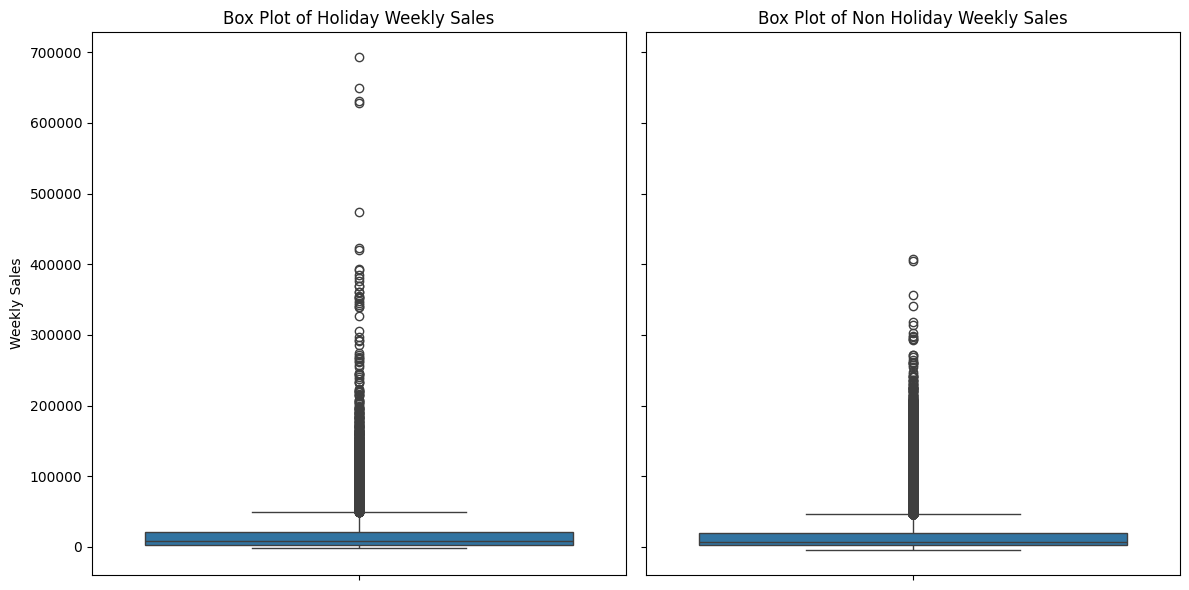

In [29]:
#Box plots for holiday and non-holiday weekly sales separately
fig,axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
#weekly sales on holidays
sns.boxplot(y='weekly_sales', data = holiday_sales , ax = axes[0])
axes[0].set_title('Box Plot of Holiday Weekly Sales')
axes[0].set_ylabel('Weekly Sales')
#weekly sales on non holidays
sns.boxplot(y='weekly_sales', data = non_holiday_sales , ax = axes[1])
axes[1].set_title('Box Plot of Non Holiday Weekly Sales')
axes[1].set_ylabel('Weekly Sales')
plt.tight_layout()
plt.savefig("../images/plots_holiday_nonholiday.png")

plt.show()
            

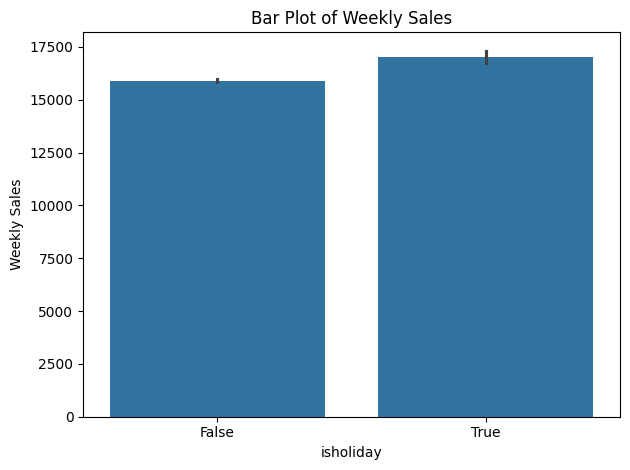

In [35]:
#bar plot
sns.barplot(x= 'isholiday',y='weekly_sales', data = combined_data )
plt.title('Bar Plot of Weekly Sales')
plt.ylabel('Weekly Sales')
plt.tight_layout()
plt.savefig("../images/plots_holiday_nonholiday1.png")
plt.show()

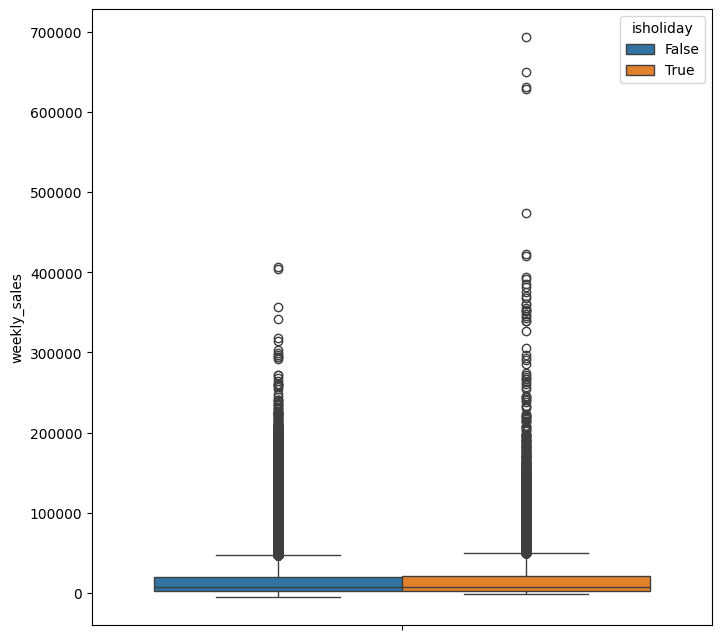

In [36]:
fig, ax = plt.subplots(figsize=(8,8))
sns.boxplot(data=combined_data, y="weekly_sales", hue="isholiday");
plt.savefig("../images/plots_holiday_nonholiday1.png")
plt.show()

The null hypothesis (H0) assumes that there is no difference in mean sales between the two groups, i.e., any observed difference is due to random variation.
The alternative hypothesis (H1) posits that there is a significant difference in mean sales between the two groups.
Since the alternative hypothesis (H1) states that there is a significant difference (not specifying whether it's an increase or decrease), it is a two-tailed test. The test will determine if the mean sales in holiday weeks are either significantly higher or significantly lower than the mean sales in non-holiday weeks. The p-value from the t-test will help assess the statistical significance of this difference.

In [43]:
from scipy import stats
# Perform a t-test to compare mean sales between holiday and non-holiday weeks
t_stat, p_value = stats.ttest_ind(holiday_sales['weekly_sales'], non_holiday_sales['weekly_sales'])

# Check if the p-value is less than 0.05 (common significance level)
if p_value < 0.05:
    print(f'There is a statistically significant difference in mean sales (p-value: {p_value})')
else:
    print(f'No statistically significant difference in mean sales (p-value: {p_value})')

print(t_stat)

There is a statistically significant difference in mean sales (p-value: 1.0912222677432845e-16)
8.294756853931894


The analysis provides insights into whether holidays have a significant impact on weekly sales and whether the observed differences are likely due to random chance. If the p-value is less than 0.05, it suggests that holidays do impact sales significantly.



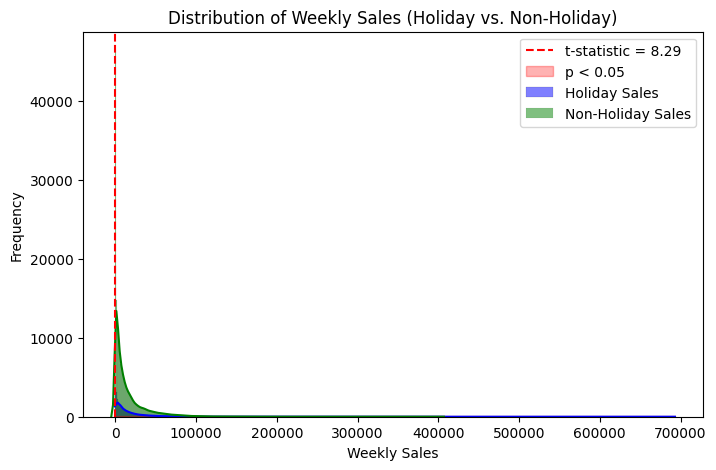

In [44]:
# Create histograms or density plots for both groups
plt.figure(figsize=(8, 5))
sns.histplot(holiday_sales['weekly_sales'], color='blue', label='Holiday Sales', kde=True)
sns.histplot(non_holiday_sales['weekly_sales'], color='green', label='Non-Holiday Sales', kde=True)

# Calculate and plot the t-statistic
t_stat, p_value = stats.ttest_ind(holiday_sales['weekly_sales'], non_holiday_sales['weekly_sales'])
plt.axvline(x=t_stat, color='red', linestyle='--', label=f't-statistic = {t_stat:.2f}')

# Shade the region corresponding to the p-value
if p_value < 0.05:
    plt.fill_betweenx([0, 50], t_stat, max(holiday_sales['weekly_sales']), color='red', alpha=0.3, label='p < 0.05')

plt.title('Distribution of Weekly Sales (Holiday vs. Non-Holiday)')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.legend()
plt.show()


The t-test results indicate that the observed difference in mean sales between holiday and non-holiday weeks is highly unlikely to have occurred by random chance alone. Therefore, it provides evidence that holidays do have a significant impact on weekly sales, at least in terms of their mean values.

Question 5: Do promotional markdowns lead to increased weekly sales?

Promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labor Day, Thanksgiving, and Christmas.

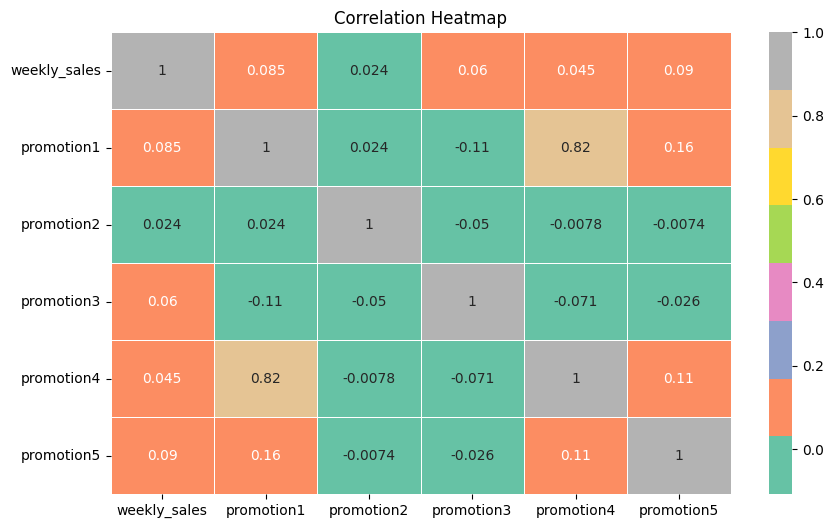

In [45]:
# Replace column names
combined_data.rename(columns={
    'markdown1': 'promotion1',
    'markdown2': 'promotion2',
    'markdown3': 'promotion3',
    'markdown4': 'promotion4',
    'markdown5': 'promotion5'
}, inplace=True)

# Calculate the correlation matrix
correlation_matrix = combined_data[['weekly_sales', 'promotion1', 'promotion2', 'promotion3', 'promotion4', 'promotion5']].corr()

# Create a heatmap to visualize correlations
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Set2', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.savefig("../images/correlation_promotional_offers.png")
plt.show()

Overall, the correlations between individual markdown types and weekly sales are relatively weak, indicating that there is not a strong linear relationship between the presence of these markdowns and the weekly sales figures. However, correlations only measure linear relationships, and there may be more complex or non-linear interactions to explore.

When interpreting correlations, it's important to keep in mind that correlation does not imply causation. A lack of strong correlation does not necessarily mean that markdowns do not impact sales; it might mean that their impact is not purely linear or that other factors play a significant role.

Null Hypothesis (H0): There is no significant difference in the mean weekly sales between markdown1 weeks during holidays and markdown1 weeks during non-holidays. 
Alternative Hypothesis (H1): There is a significant difference in the mean weekly sales between markdown1 weeks during holidays and markdown1 weeks during non-holidays. 

In [46]:
markdown1_val_hol = combined_data.groupby('promotion1').filter(lambda x: x['isholiday'].any() == True)
markdown1_val_hol_m = markdown1_val_hol['weekly_sales'].mean()
markdown1_val_nonhol = combined_data.groupby('promotion1').filter(lambda x: x['isholiday'].any() == False)
markdown1_val_nonhol_m = markdown1_val_nonhol['weekly_sales'].mean()

# Perform a t-test to compare mean sales between markdown1 of holiday and non-holiday weeks
t_stat, p_value = stats.ttest_ind(markdown1_val_hol['weekly_sales'], markdown1_val_nonhol['weekly_sales'])

# Check if the p-value is less than 0.05 (common significance level)
if p_value < 0.05:
    print(f'There is a statistically significant difference in mean sales (p-value: {p_value})')
    print ("Hypothesis rejected :markdown1 effects weekly sales")
else:
    print(f'No statistically significant difference in mean sales (p-value: {p_value})')
    print ("Hypothesis accepted:markdown effects weekly sales")

There is a statistically significant difference in mean sales (p-value: 8.06606452841541e-12)
Hypothesis rejected :markdown1 effects weekly sales


strong statistical evidence that there is a significant difference in mean weekly sales between markdown1 weeks during holidays and markdown1 weeks during non-holidays.

In [48]:
# Fill the 'markdown1' column with 0 for all rows
combined_data['promotion1'] = combined_data['promotion1'].fillna(0)

In [78]:
# Select data for holidays with markdown
holidays_with_markdown = combined_data[(combined_data['isholiday'] == True) & (combined_data['promotion1'] > 0)]

# Select data for holidays without markdown
holidays_without_markdown = combined_data[(combined_data['isholiday'] == True) & (combined_data['promotion1'] == 0)]
# Perform a t-test to compare mean sales between  holiday with markdown and without markdown
t_stat, p_value = stats.ttest_ind(holidays_with_markdown['weekly_sales'], holidays_without_markdown['weekly_sales'])

# Check if the p-value is less than 0.05 (common significance level)
if p_value < 0.05:
    print(f'There is a statistically significant difference in mean sales (p-value: {p_value})')
    print ("promotion 1 has a significant impact on weekly sales")
else:
    print(f'No statistically significant difference in mean sales (p-value: {p_value})')
    print ("promotion 1 has no significant impact on weekly sales")


There is a statistically significant difference in mean sales (p-value: 0.001676001386899121)
promotion 1 has a significant impact on weekly sales


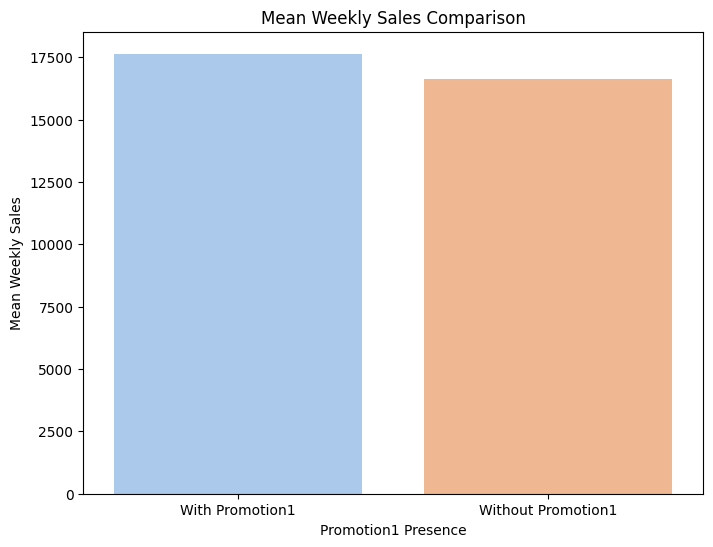

In [80]:
# Create a bar plot to compare mean sales between holiday weeks with and without markdown
plt.figure(figsize=(8, 6))
sns.barplot(x=['With Promotion1', 'Without Promotion1'], 
            y=[holidays_with_markdown['weekly_sales'].mean(), holidays_without_markdown['weekly_sales'].mean()], hue= ['With Markdown1', 'Without Markdown1'], 
            palette = "pastel" , legend = False)
plt.title('Mean Weekly Sales Comparison')
plt.xlabel('Promotion1 Presence')
plt.ylabel('Mean Weekly Sales')
plt.savefig("../images/promotion1.png")
plt.show()

In [81]:
# Fill the 'markdown2' column with 0 for all rows
combined_data['promotion2'] = combined_data['promotion2'].fillna(0)

In [82]:
# Select data for holidays with markdown
holidays_with_markdown2 = combined_data[(combined_data['isholiday'] == True) & (combined_data['promotion2'] > 0)]

# Select data for holidays without markdown
holidays_without_markdown2 = combined_data[(combined_data['isholiday'] == True) & (combined_data['promotion2'] == 0)]
# Perform a t-test to compare mean sales between  holiday with markdown and without markdown
t_stat, p_value = stats.ttest_ind(holidays_with_markdown2['weekly_sales'], holidays_without_markdown2['weekly_sales'])

# Check if the p-value is less than 0.05 (common significance level)
if p_value < 0.05:
    print(f'There is a statistically significant difference in mean sales (p-value: {p_value})')
    print ("promotion 2 has a significant impact on weekly sales")
else:
    print(f'No statistically significant difference in mean sales (p-value: {p_value})')
    print ("promotion2 has no significant impact on weekly sales")


There is a statistically significant difference in mean sales (p-value: 6.216017956979932e-10)
promotion 2 has a significant impact on weekly sales


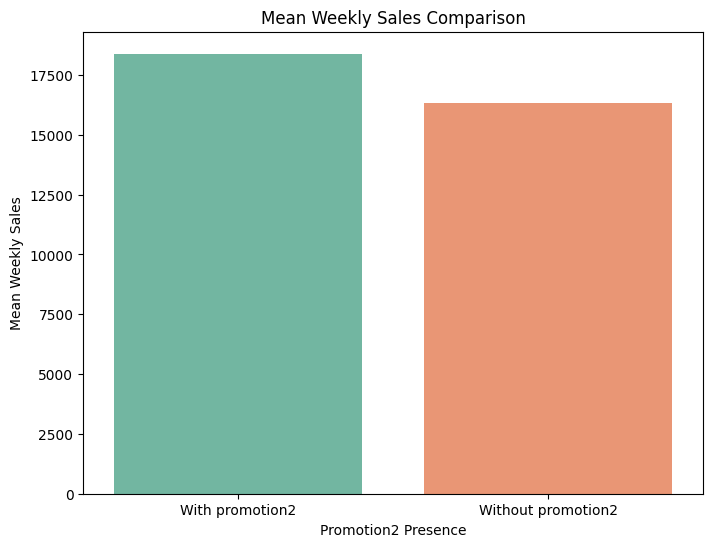

In [83]:
# Create a bar plot to compare mean sales between holiday weeks with and without markdown
plt.figure(figsize=(8, 6))
sns.barplot(x=['With promotion2', 'Without promotion2'], 
            y=[holidays_with_markdown2['weekly_sales'].mean(), holidays_without_markdown2['weekly_sales'].mean()],hue= ['With promotion2', 'Without promotion2'], 
            palette = "Set2" , legend = False)
plt.title('Mean Weekly Sales Comparison')
plt.xlabel('Promotion2 Presence')
plt.ylabel('Mean Weekly Sales')
plt.savefig("../images/promotion2.png")
plt.show()

In [84]:
# Fill the 'markdown3' column with 0 for all rows
combined_data['promotion3'] = combined_data['promotion3'].fillna(0)

In [85]:
# Select data for holidays with markdown
holidays_with_markdown3 = combined_data[(combined_data['isholiday'] == True) & (combined_data['promotion3'] > 0)]

# Select data for holidays without markdown
holidays_without_markdown3 = combined_data[(combined_data['isholiday'] == True) & (combined_data['promotion3'] == 0)]
# Perform a t-test to compare mean sales between  holiday with markdown and without markdown
t_stat, p_value = stats.ttest_ind(holidays_with_markdown3['weekly_sales'], holidays_without_markdown3['weekly_sales'])

# Check if the p-value is less than 0.05 (common significance level)
if p_value < 0.05:
    print(f'There is a statistically significant difference in mean sales (p-value: {p_value})')
    print ("promotion 3 has a significant impact on weekly sales")
else:
    print(f'No statistically significant difference in mean sales (p-value: {p_value})')
    print ("promotion 3 has no significant impact on weekly sales")


There is a statistically significant difference in mean sales (p-value: 1.944119352295365e-07)
promotion 3 has a significant impact on weekly sales


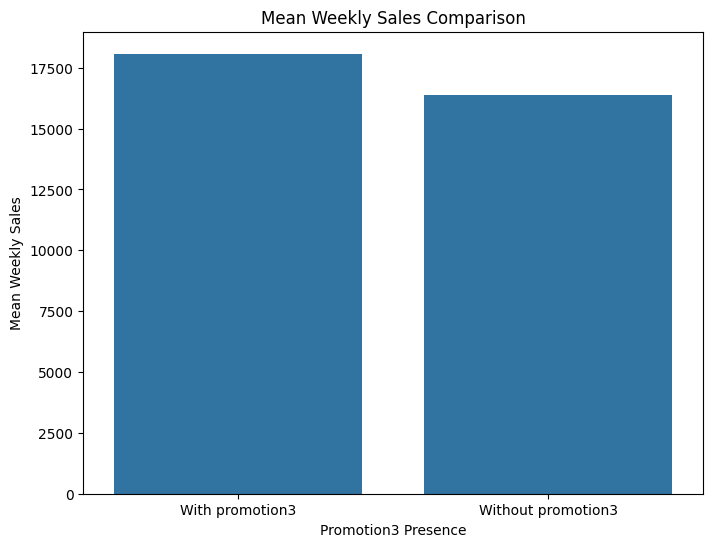

In [86]:
# Create a bar plot to compare mean sales between holiday weeks with and without markdown
plt.figure(figsize=(8, 6))
sns.barplot(x=['With promotion3', 'Without promotion3'], 
            y=[holidays_with_markdown3['weekly_sales'].mean(), holidays_without_markdown3['weekly_sales'].mean()])
plt.title('Mean Weekly Sales Comparison')
plt.xlabel('Promotion3 Presence')
plt.ylabel('Mean Weekly Sales')
plt.savefig("../images/promotion3.png")
plt.show()

In [70]:
# Fill the 'markdown2' column with 0 for all rows
combined_data['promotion4'] = combined_data['promotion4'].fillna(0)

In [71]:
# Select data for holidays with markdown
holidays_with_markdown4 = combined_data[(combined_data['isholiday'] == True) & (combined_data['promotion4'] > 0)]

# Select data for holidays without markdown
holidays_without_markdown4 = combined_data[(combined_data['isholiday'] == True) & (combined_data['promotion4'] == 0)]
# Perform a t-test to compare mean sales between  holiday with markdown and without markdown
t_stat, p_value = stats.ttest_ind(holidays_with_markdown4['weekly_sales'], holidays_without_markdown4['weekly_sales'])

# Check if the p-value is less than 0.05 (common significance level)
if p_value < 0.05:
    print(f'There is a statistically significant difference in mean sales (p-value: {p_value})')
    print ("promotion 4 has a significant impact on weekly sales")
else:
    print(f'No statistically significant difference in mean sales (p-value: {p_value})')
    print ("promotion 4 has no significant impact on weekly sales")


There is a statistically significant difference in mean sales (p-value: 1.2296910409949956e-10)
promotion 4 has a significant impact on weekly sales


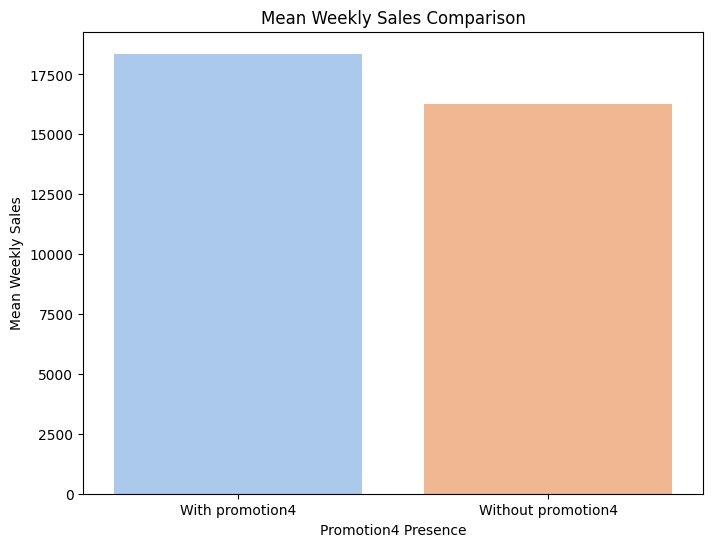

In [87]:
# Create a bar plot to compare mean sales between holiday weeks with and without Markdown4
plt.figure(figsize=(8, 6))
sns.barplot(x=['With promotion4', 'Without promotion4'], 
            y=[holidays_with_markdown4['weekly_sales'].mean(), holidays_without_markdown4['weekly_sales'].mean()], hue =['With promotion4', 'Without promotion4']
           ,palette="pastel" , legend = False)
plt.title('Mean Weekly Sales Comparison')
plt.xlabel('Promotion4 Presence')
plt.ylabel('Mean Weekly Sales')
plt.savefig("../images/promotion4.png")
plt.show()


In [88]:
# Fill the 'markdown5' column with 0 for all rows
combined_data['promotion5'] = combined_data['promotion5'].fillna(0)

In [89]:
# Select data for holidays with markdown
holidays_with_markdown5 = combined_data[(combined_data['isholiday'] == True) & (combined_data['promotion5'] > 0)]

# Select data for holidays without markdown
holidays_without_markdown5 = combined_data[(combined_data['isholiday'] == True) & (combined_data['promotion5'] == 0)]
# Perform a t-test to compare mean sales between  holiday with markdown and without markdown
t_stat, p_value = stats.ttest_ind(holidays_with_markdown5['weekly_sales'], holidays_without_markdown5['weekly_sales'])

# Check if the p-value is less than 0.05 (common significance level)
if p_value < 0.05:
    print(f'There is a statistically significant difference in mean sales (p-value: {p_value})')
    print ("promotion 5 has a significant impact on weekly sales")
else:
    print(f'No statistically significant difference in mean sales (p-value: {p_value})')
    print ("promotion 5 has no significant impact on weekly sales")


There is a statistically significant difference in mean sales (p-value: 0.0035939949030218098)
promotion 5 has a significant impact on weekly sales


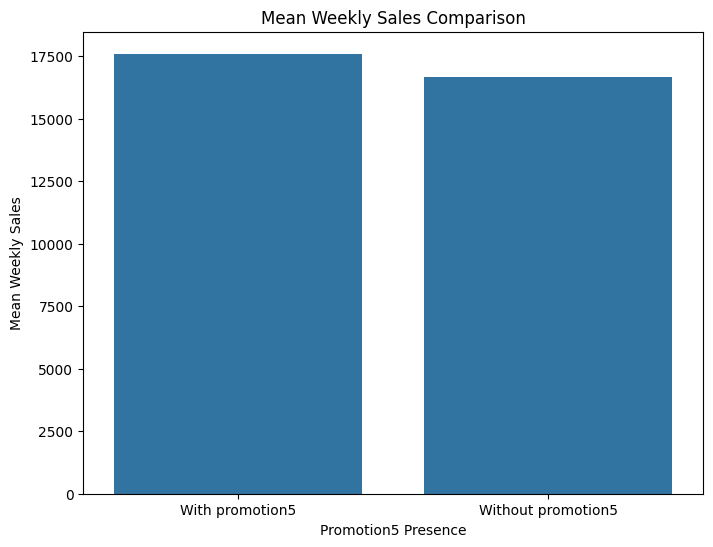

In [90]:
# Create a bar plot to compare mean sales between holiday weeks with and without markdown
plt.figure(figsize=(8, 6))
sns.barplot(x=['With promotion5', 'Without promotion5'], 
            y=[holidays_with_markdown5['weekly_sales'].mean(), holidays_without_markdown5['weekly_sales'].mean()])
plt.title('Mean Weekly Sales Comparison')
plt.xlabel('Promotion5 Presence')
plt.ylabel('Mean Weekly Sales')
plt.savefig("../images/promotion5.png")
plt.show()

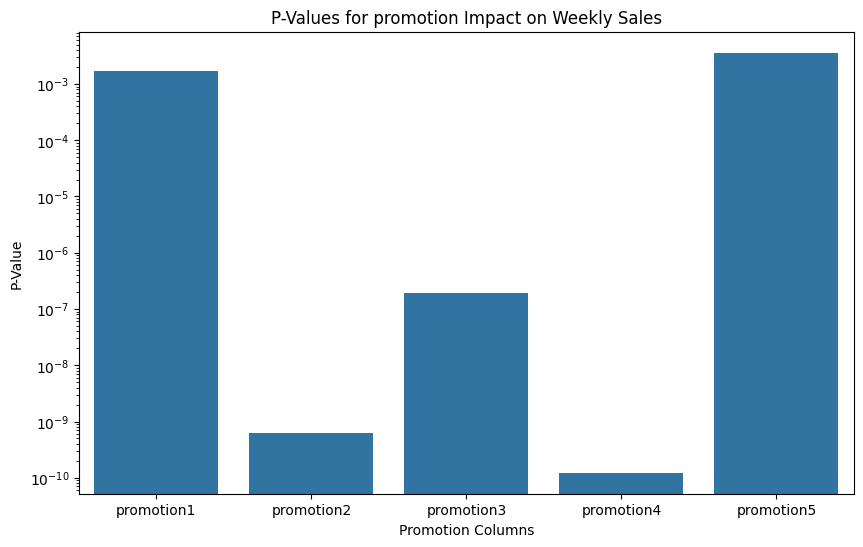

promotion 1: Hypothesis rejected: Markdown effects weekly sales (p-value: 0.001676001386899121)
promotion 2: Hypothesis rejected: Markdown effects weekly sales (p-value: 6.216017956979932e-10)
promotion 3: Hypothesis rejected: Markdown effects weekly sales (p-value: 1.944119352295365e-07)
promotion 4: Hypothesis rejected: Markdown effects weekly sales (p-value: 1.2296910409949956e-10)
promotion 5: Hypothesis rejected: Markdown effects weekly sales (p-value: 0.0035939949030218098)


In [91]:
# List of markdown columns (replace with your actual column names)
markdown_columns = ['promotion1', 'promotion2', 'promotion3', 'promotion4', 'promotion5']

# Create an empty list to store the p-values for each markdown
p_values = []

# Create an empty list to store the results (Hypothesis accepted/rejected) for each markdown
results = []

for markdown_column in markdown_columns:
    # Select data for holidays with the current markdown
    holidays_with_markdown = combined_data[(combined_data['isholiday'] == True) & (combined_data[markdown_column] > 0)]

    # Select data for holidays without the current markdown
    holidays_without_markdown = combined_data[(combined_data['isholiday'] == True) & (combined_data[markdown_column] == 0)]

    # Perform a t-test to compare mean sales between holiday weeks with and without the current markdown
    t_stat, p_value = stats.ttest_ind(holidays_with_markdown['weekly_sales'], holidays_without_markdown['weekly_sales'])

    # Append the p-value to the p_values list
    p_values.append(p_value)

    # Determine if the hypothesis is accepted or rejected based on the p-value
    if p_value < 0.05:
        results.append("Hypothesis rejected: Markdown effects weekly sales")
    else:
        results.append("Hypothesis accepted: Markdown does not significantly affect weekly sales")

# Create a bar plot to visualize p-values for each markdown
plt.figure(figsize=(10, 6))
sns.barplot(x=markdown_columns, y=p_values)
plt.title('P-Values for promotion Impact on Weekly Sales')
plt.xlabel('Promotion Columns')
plt.ylabel('P-Value')
plt.yscale('log')  # Use log scale for better visualization
plt.savefig("../images/pval.png")
plt.show()

# Display the results for each markdown
for i, markdown_column in enumerate(markdown_columns):
    print(f"promotion {i + 1}: {results[i]} (p-value: {p_values[i]})")


 Holidays combined with markdowns tend to show higher average weekly sales. This is evident in the analysis where you compared mean sales during holiday weeks with and without markdowns.